In [1]:
import pandas as pd


In [2]:
data_frame = pd.read_csv("raw_data.csv")
data_frame

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30-09-2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30-11-2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10-03-2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03-11-2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24-07-2008,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,30-12-2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,19-01-2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,05-11-2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,10-01-2008,Female,Service,No,2,5.0,5.9,0.52


In [3]:
data_frame

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30-09-2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30-11-2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10-03-2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03-11-2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24-07-2008,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,30-12-2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,19-01-2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,05-11-2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,10-01-2008,Female,Service,No,2,5.0,5.9,0.52


In [4]:
data_frame.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [5]:
data_frame.drop(['Employee ID', 'Date of Joining'], axis=1, inplace=True)

In [6]:
data_frame.isnull().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [7]:
data_frame['Resource Allocation'].fillna(data_frame['Resource Allocation'].mean(), inplace=True)
data_frame['Mental Fatigue Score'].fillna(data_frame['Mental Fatigue Score'].mean(), inplace=True)
data_frame['Burn Rate'].fillna(data_frame['Burn Rate'].mean(), inplace=True)

In [8]:
data_frame.isnull().sum()

Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [9]:
for col in ['Gender', 'Company Type', 'WFH Setup Available','Resource Allocation','Mental Fatigue Score','Burn Rate']:
    print(f"\n{col}")
    print(data_frame[col].unique())


Gender
['Female' 'Male']

Company Type
['Service' 'Product']

WFH Setup Available
['No' 'Yes']

Resource Allocation
[ 3.          2.          4.48139829  1.          7.          4.
  6.          5.          8.         10.          9.        ]

Mental Fatigue Score
[ 3.8         5.          5.8         2.6         6.9         3.6
  7.9         4.4         5.72818785  5.3         1.8         4.7
  5.9         6.7         4.          7.6         6.3         7.7
  6.6         7.4         3.9         3.          8.7         7.3
  5.4         6.          7.5        10.          6.4         5.1
  5.6         6.1         3.1         8.          6.8         4.9
  9.2         6.5         6.2         8.2         4.1         4.3
  0.8         2.9         2.          9.1         0.          5.7
  8.3         5.5         7.          3.3         7.8         7.2
  5.2         8.9         4.5         8.1         8.6         9.5
  3.5         4.8         2.4         3.7         1.          8.8
  9.3   

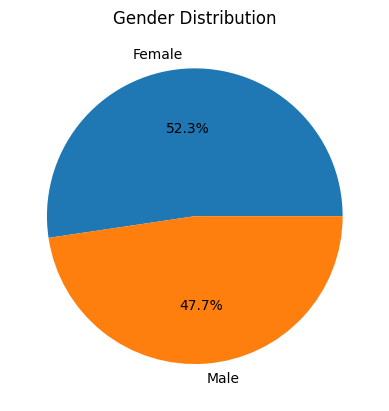

In [10]:
import matplotlib.pyplot as plt

gender_counts = data_frame['Gender'].value_counts()

plt.figure()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

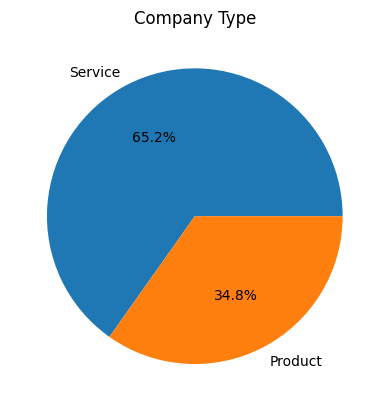

In [11]:
company_counts = data_frame['Company Type'].value_counts()

plt.figure()
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%')
plt.title('Company Type')
plt.show()

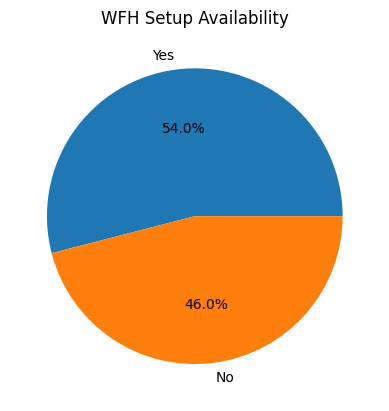

In [12]:
wfh_counts = data_frame['WFH Setup Available'].value_counts()

plt.figure()
plt.pie(wfh_counts, labels=wfh_counts.index, autopct='%1.1f%%')
plt.title('WFH Setup Availability')
plt.show()

In [13]:
from scipy.stats import chi2_contingency

ds_test1 = data_frame.dropna(subset=['Gender', 'WFH Setup Available'])
table1 = pd.crosstab(ds_test1['Gender'], ds_test1['WFH Setup Available'])
chi2, p, dof, expected = chi2_contingency(table1)
print("Test 1: Gender vs WFH Setup")
print("Chi2:", chi2)
print("P-value:", p)


Test 1: Gender vs WFH Setup
Chi2: 121.92511789712225
P-value: 2.397169705051993e-28


In [14]:

from scipy.stats import chi2_contingency


bins = [0, 0.4, 0.7, 1.0]
labels = ['Low', 'Medium', 'High']

data_frame['Burnout Level'] = pd.cut(data_frame['Burn Rate'], bins=bins, labels=labels)

ds_test = data_frame.dropna(subset=['Burnout Level', 'WFH Setup Available'])
table = pd.crosstab(ds_test['Burnout Level'], ds_test['WFH Setup Available'])

chi2, p, dof, expected = chi2_contingency(table)

print("Test 2: Burnout Level vs WFH Setup")
print("Chi2:", chi2)
print("P-value:", p)

Test 2: Burnout Level vs WFH Setup
Chi2: 1583.3338796685348
P-value: 0.0


In [15]:
data_frame.to_csv(r'S:\coursework\AI\courworkDevelopment\Cleaned_dataset.csv', index=False)

In [16]:
df = pd.read_csv("Cleaned_dataset.csv")

In [17]:
df['Company Type'].unique()

array(['Service', 'Product'], dtype=object)

In [18]:
df['Company Type'] = df['Company Type'].map({
    'Service': 1,
    'Product': 0
})

In [19]:
df['Company Type'].unique()

array([1, 0])

In [20]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
df['Gender'] = df['Gender'].map({
    'Male': 1,
    'Female': 0
})

In [22]:
df['Gender'].unique()

array([0, 1])

In [23]:
df['WFH Setup Available'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
df['WFH Setup Available'] = df['WFH Setup Available'].map({
    'Yes': 1,
    'No': 0
})

In [25]:
df['WFH Setup Available'].unique()

array([0, 1])

In [26]:
df.isnull().sum()

Gender                    0
Company Type              0
WFH Setup Available       0
Designation               0
Resource Allocation       0
Mental Fatigue Score      0
Burn Rate                 0
Burnout Level           272
dtype: int64

In [27]:
df.isnull().sum()

Gender                    0
Company Type              0
WFH Setup Available       0
Designation               0
Resource Allocation       0
Mental Fatigue Score      0
Burn Rate                 0
Burnout Level           272
dtype: int64

In [37]:
df['Burnout Level'].unique()
df['Burn Rate'].dropna()

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64

In [ ]:
df['Burnout Level'].unique()

array(['Low', 'Medium', 'High', nan], dtype=object)

In [47]:
df = df.dropna(subset=['Burnout Level'])

In [48]:
df['Burnout Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [57]:
df['Burnout Level'] = df['Burnout Level'].map({
    'Low': 1,
    'Medium': 2,
    'High': 3
})

# Verify
print(df['Burnout Level'].unique())

[1 2 3]


In [63]:
df

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Burnout Level
0,0,1,0,2,3.000000,3.800000,0.16,1
1,1,1,1,1,2.000000,5.000000,0.36,1
2,0,0,1,2,4.481398,5.800000,0.49,2
3,1,1,1,1,1.000000,2.600000,0.20,1
4,0,1,0,3,7.000000,6.900000,0.52,2
...,...,...,...,...,...,...,...,...
22745,0,1,0,1,3.000000,5.728188,0.41,2
22746,0,0,1,3,6.000000,6.700000,0.59,2
22747,1,1,1,3,7.000000,5.728188,0.72,3
22748,0,1,0,2,5.000000,5.900000,0.52,2


In [65]:
y = df['Burn Rate']

X = df.drop('Burn Rate', axis=1)

In [66]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      
    random_state=42,    
    stratify=y          
)

In [67]:
X_test

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burnout Level
15626,0,1,1,2,4.000000,6.400000,2
9412,1,0,1,2,1.000000,2.700000,1
14037,1,0,1,2,3.000000,5.000000,1
21203,1,0,1,3,6.000000,9.500000,3
10482,0,1,0,2,4.481398,5.728188,2
...,...,...,...,...,...,...,...
21588,0,1,0,1,4.481398,5.728188,1
4237,1,1,0,2,5.000000,5.700000,2
11376,1,0,1,3,5.000000,5.600000,1
10846,0,1,0,1,2.000000,5.728188,1


In [68]:
X_test

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burnout Level
15626,0,1,1,2,4.000000,6.400000,2
9412,1,0,1,2,1.000000,2.700000,1
14037,1,0,1,2,3.000000,5.000000,1
21203,1,0,1,3,6.000000,9.500000,3
10482,0,1,0,2,4.481398,5.728188,2
...,...,...,...,...,...,...,...
21588,0,1,0,1,4.481398,5.728188,1
4237,1,1,0,2,5.000000,5.700000,2
11376,1,0,1,3,5.000000,5.600000,1
10846,0,1,0,1,2.000000,5.728188,1


In [69]:
y_train

6386     0.33
5316     0.45
19637    0.26
6547     0.35
17362    0.38
         ... 
17973    0.28
17707    0.41
9485     0.61
4999     0.70
15486    0.33
Name: Burn Rate, Length: 17982, dtype: float64

In [70]:
y_test

15626    0.45
9412     0.08
14037    0.33
21203    0.81
10482    0.65
         ... 
21588    0.39
4237     0.52
11376    0.38
10846    0.19
11959    0.74
Name: Burn Rate, Length: 4496, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# --- Evaluation function ---
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"Model": name, "RMSE": rmse, "R²": r2}

# --- Collect results ---
results = []

# Linear Regression
y_pred_lr = lr_model.predict(X_test)
results.append(evaluate_model("Linear Regression", y_test, y_pred_lr))

# Random Forest
y_pred_rf = rf_model.predict(X_test)
results.append(evaluate_model("Random Forest", y_test, y_pred_rf))

# KNN (scaled)
y_pred_knn = knn_model.predict(X_test_scaled)
results.append(evaluate_model("KNN", y_test, y_pred_knn))

# --- Display results in a table ---
results_df = pd.DataFrame(results)
print(results_df)


TypeError: LinearModel.predict() missing 1 required positional argument: 'X'